In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
sns.set_style('darkgrid')
%matplotlib inline

In [58]:
df = pd.read_csv('news.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 123.8+ KB


In [60]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6335.0,5280.415627,3038.503953,2.0,2674.5,5271.0,7901.0,10557.0


In [61]:
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [62]:
labels = df.label

In [63]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

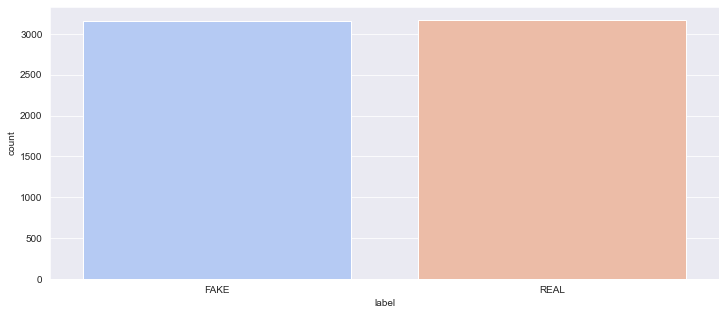

In [64]:
plt.figure(figsize = (12, 5))
sns.countplot(x = 'label', data = df, palette = 'coolwarm')

In [65]:
labels.count()

6335

In [66]:
X = df['text']
y = labels

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

In [71]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [72]:
tfidf_test = tfidf_vectorizer.transform(X_test)

In [73]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [74]:
pac = PassiveAggressiveClassifier(max_iter = 50)

In [75]:
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [76]:
y_pred = pac.predict(tfidf_test)

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [86]:
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')
score

Accuracy: 93.9%


0.9389794844818516

In [79]:
confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

array([[900,  43],
       [ 73, 885]], dtype=int64)

In [80]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n        FAKE       0.92      0.95      0.94       943\n        REAL       0.95      0.92      0.94       958\n\n    accuracy                           0.94      1901\n   macro avg       0.94      0.94      0.94      1901\nweighted avg       0.94      0.94      0.94      1901\n'